In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [2]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([2, 5, 3, 0])

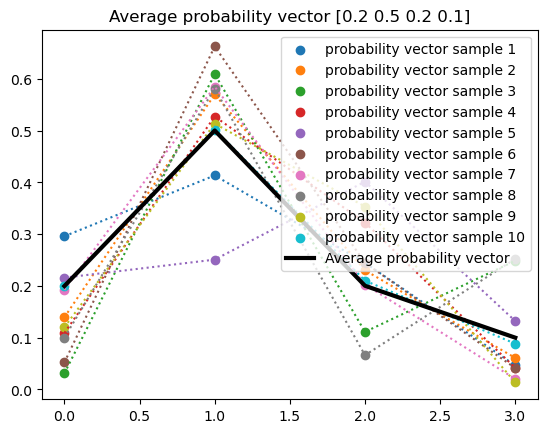

In [3]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

When time $t=0$, there is significant variation in the purchasing patterns. Each $\mathbf x^{(t)}$ captures the initial distribution of chip purchases.

As time goes, the distribution represented by $\mathbf x^{(t)}$ would tend to stabilize. The customers may have preferred chip brands, leading to a relatively consistent pattern of purchases over time.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


Posterior parameter $\alpha'$: $\alpha+\mathbf x^{(t)}$

PDF: $f(\mathbf p |\mathbf x^{(t)}, \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha')} \prod_{i=1}^k p_i^{\alpha'_i - 1} \quad$

According to a Bayesian Analysis, our belief about the "best chips" at time $t$ can be inferred from the posterior distribution $p(\mathbf p | \mathbf x^{(t)})$. The parameter of this distribution provides the updated probabilities for each chip brand being the best, taking into account both prior belief and observed data.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [19]:
j=1
p_j_value = np.array([[2, 5, 2, 1]])[0,j]

5

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

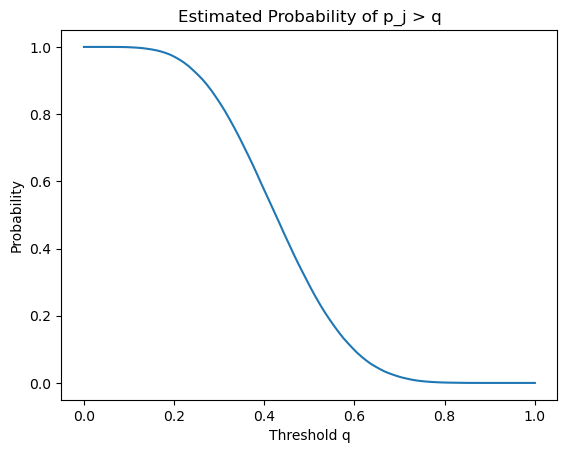

In [11]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`


observed_counts = [2, 5, 2, 1]
alphas = np.ones(len(observed_counts))

j = 1
thresholds = np.linspace(0, 1, 100)

posterior_samples = stats.dirichlet(alphas + observed_counts).rvs(size=100000)
p_j_samples = posterior_samples[:, j]

probability_p_j_gt_q = [np.mean(p_j_samples > q) for q in thresholds]

plt.plot(thresholds, probability_p_j_gt_q, label=f'Estimated Pr(p_j > q)')
plt.xlabel('Threshold q')
plt.ylabel('Probability')
plt.title('Estimated Probability of p_j > q')
plt.show()


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [24]:
np.quantile(p_j_samples, [.025, .975])

array([0.19440106, 0.68423428])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

Estimated probability of p_j > p_j_prime: 0.499725


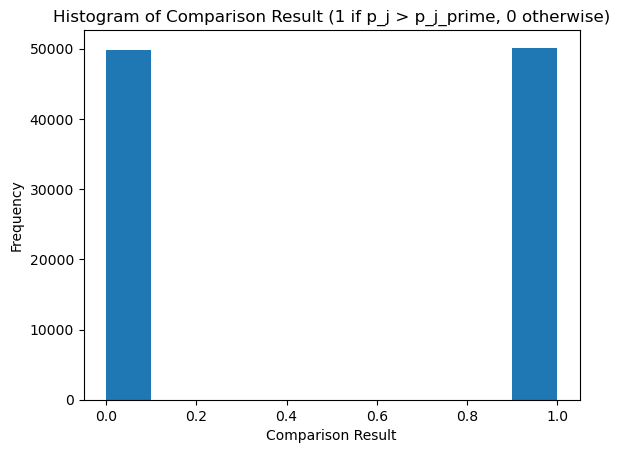

In [29]:

n = 100000

p_j_samples = dirichlet(alphas + observed_counts).rvs(n)
p_j_prime_samples = dirichlet(alphas + observed_counts).rvs(n)

probability_p_j_gt_p_j_prime = np.mean(p_j_samples > p_j_prime_samples)

print("Estimated probability of p_j > p_j_prime:", probability_p_j_gt_p_j_prime)

plt.hist((p_j_samples[:, 0] > p_j_prime_samples[:, 0]).astype(int))
plt.xlabel('Comparison Result')
plt.ylabel('Frequency')
plt.title('Histogram of Comparison Result (1 if p_j > p_j_prime, 0 otherwise)')
plt.show()



7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


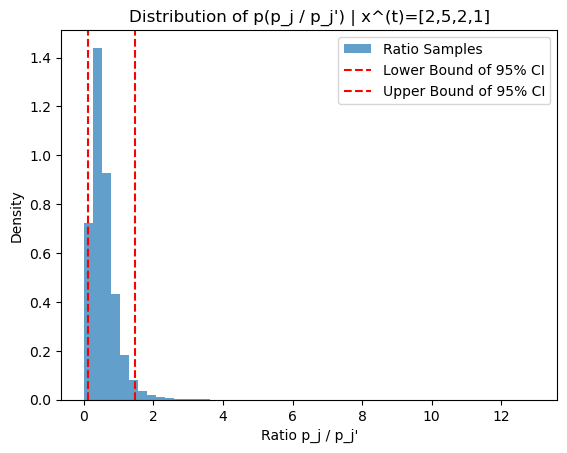

In [30]:
p_j_samples = dirichlet(alphas + observed_counts).rvs(n)
p_j_prime_samples = dirichlet(alphas + observed_counts).rvs(n)

j=0;j_prime=1
ratio_samples = p_j_samples[:, j] / p_j_prime_samples[:, j_prime]

confidence_interval = np.percentile(ratio_samples, [2.5, 97.5])

plt.hist(ratio_samples, bins=50, density=True, alpha=0.7, label='Ratio Samples')

plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower Bound of 95% CI')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Upper Bound of 95% CI')

plt.xlabel('Ratio p_j / p_j\'')
plt.ylabel('Density')
plt.title('Distribution of p(p_j / p_j\') | x^(t)=[2,5,2,1]')
plt.legend()
plt.show()


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


[double click and replace this with your answer]

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


[double click and replace this with your answer]